In [1]:
import numpy as np
from sklearn.cluster import DBSCAN

from mapper.core import *
from mapper.cover import *
from mapper.clustering import *
from mapper.plot import MapperPlot

import matplotlib.pyplot as plt


data = [np.random.rand(10) for _ in range(100)]

cover_algo = BallCover(radius=1.5, metric=lambda x, y: np.linalg.norm(x - y))
mapper_algo = MapperAlgorithm(cover=cover_algo, clustering=TrivialClustering())
mapper_graph = mapper_algo.build_graph(data)

In [2]:
mapper_plot = MapperPlot(data, mapper_graph)
mapper_plot.color_graph()

In [3]:
fig = mapper_plot.plot('plotly', 512, 512, 'mean lens')
fig.show()

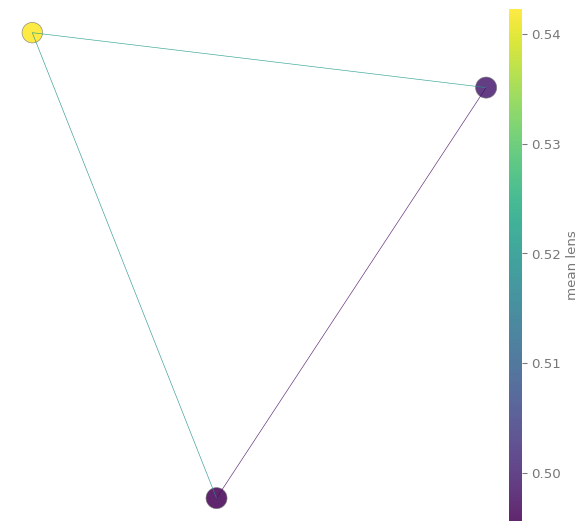

In [4]:
%matplotlib inline
mapper_plot.plot('matplotlib', 512, 512, 'mean lens')
plt.show()